In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [338]:
from PIML.box.boxWR import BoxWR

In [339]:
bb = BoxWR()

#220 R=1000.00
(2204,) (220,)
[105.32   7.07   5.2    1.44   1.21   0.76   0.57   0.49   0.35   0.28]
Building RBF with gaussan kernel on data shape (2880,)
Building RBF with gaussan kernel on data shape (2880, 10)


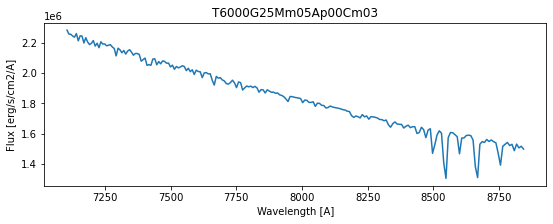

In [340]:
W="RedM"; R="R"; Res=5000;step=10;
bb.init(W,R, Res,step, onPCA=1)

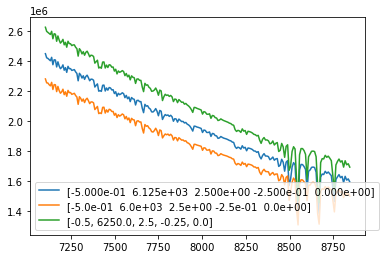

In [320]:
pmt2 = [-5.0e-01,  6.25e+03,  2.5e+00, -2.5e-01,  0.0e+00]
bb.test_rbf(bb.PhyMid, pmt2)

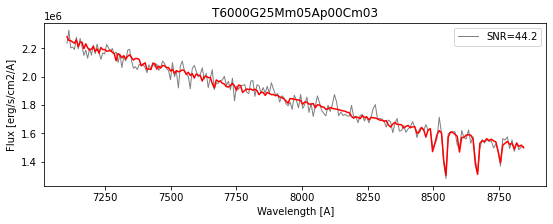

In [321]:
snr =50
obsflux, obsvar = bb.make_obs_from_pmt(bb.PhyMid, snr, plot=1)

In [322]:
bb.init_LLH()

Fitting with Template T6000G25Mm05Ap00Cm03
estimate 5928.579425811768


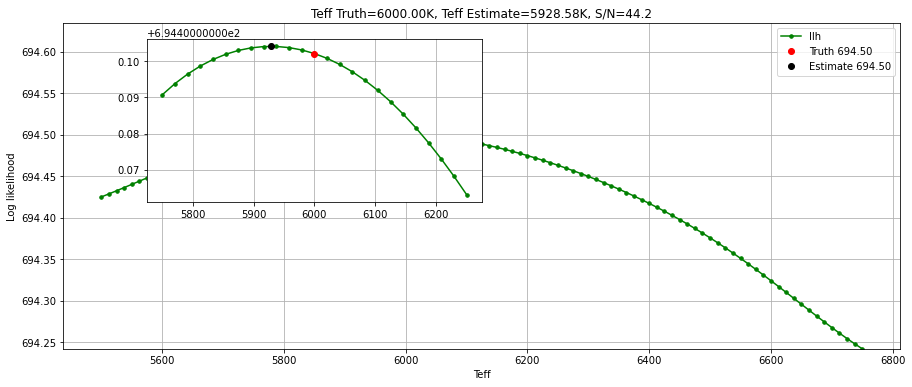

In [323]:
temp_pmt = bb.PhyMid
_=bb.LLH.eval_pmt_on_axis(temp_pmt, temp_pmt[1], obsflux, obsvar, axis="T")

Fitting with Template T6000G25Mm05Ap00Cm03
estimate -0.5631835937500002


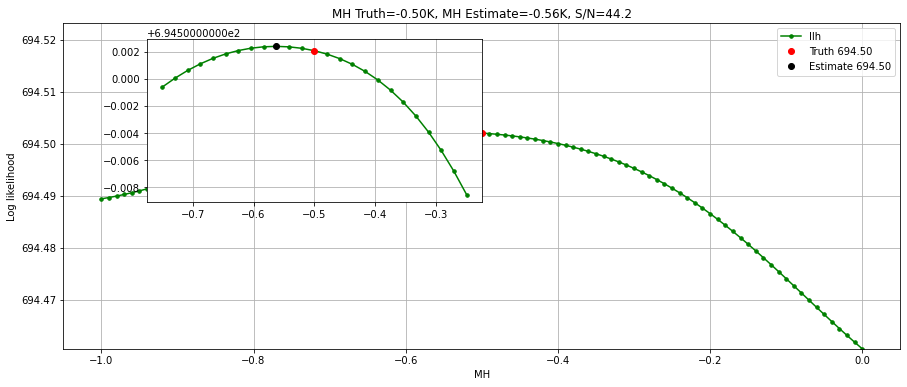

In [324]:
_=bb.LLH.eval_pmt_on_axis(temp_pmt, temp_pmt[0], obsflux, obsvar, axis="M")

Fitting with Template T6000G25Mm05Ap00Cm03
estimate 2.78338623046875


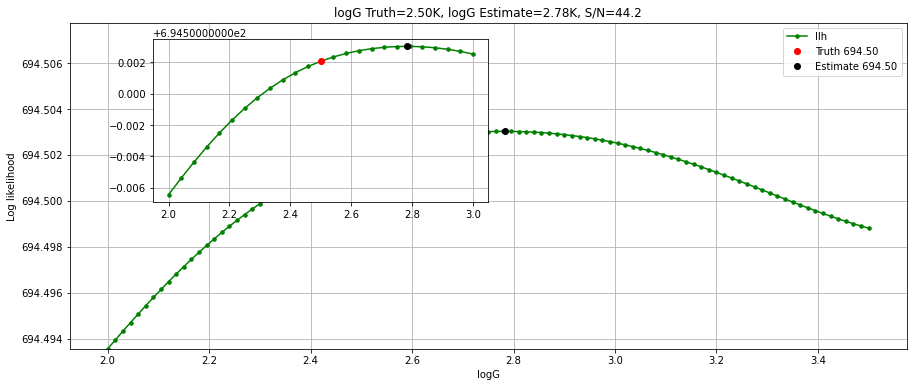

In [325]:
_=bb.LLH.eval_pmt_on_axis(temp_pmt, temp_pmt[2], obsflux, obsvar, axis="G")

100%|██████████| 10/10 [00:33<00:00,  3.34s/it]


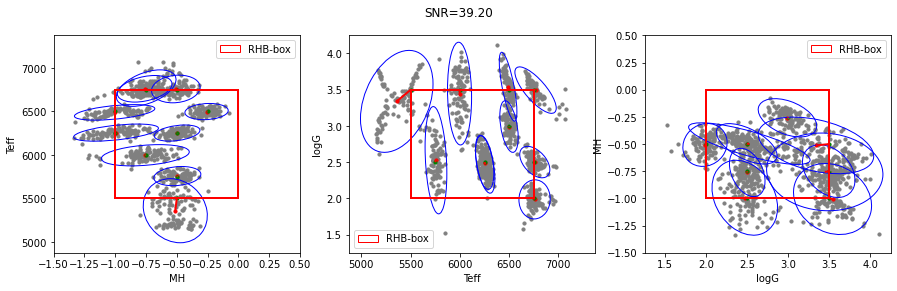

In [342]:
bb.eval_LLH_snr(snr, N_pmt=10, N_obs=100)

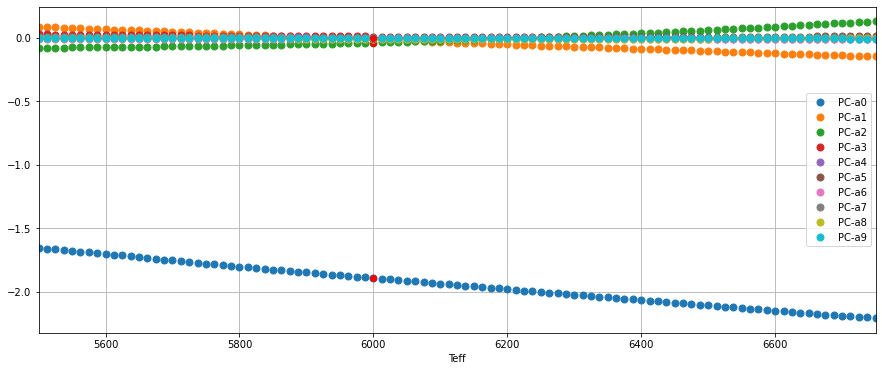

In [360]:
adx=1
bb.plot_coeff_on_pmt(bb.rbf_coeff, axis="T", fn_name="")

In [344]:

bb.rbf_coeff(bb.PhyMid)

array([-1.89189589e+00, -1.29541130e-02, -3.72722472e-02,  1.01674931e-02,
        1.65208172e-03, -3.71346772e-03, -1.13098203e-02,  1.05191238e-03,
       -6.76999511e-03,  9.55919932e-04])

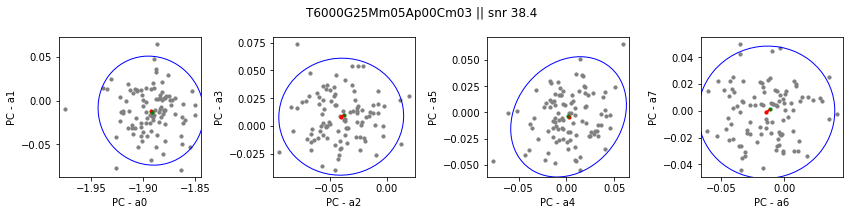

In [432]:
coeff, COEFF,snr=bb.eval_coeff_bias(bb.PhyMid, snr=50, N_obs=100, plot=1)

100%|██████████| 10/10 [00:00<00:00, 170.57it/s]


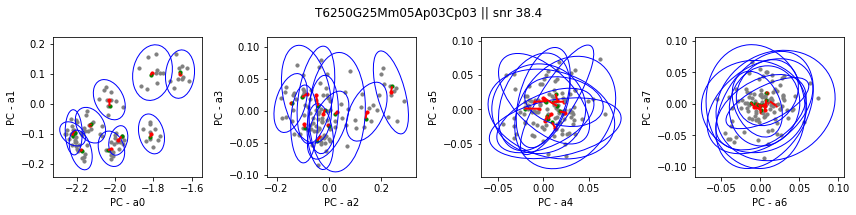

In [441]:
bb.eval_coeff_snr(snr, pmts=None, N_pmt=10, N_obs=10, N_plot =None)

In [ ]:
fns, SNRs = bb.eval_coeff(snrList=[10,20,50,100])

  0%|          | 0/10 [00:00<?, ?it/s]

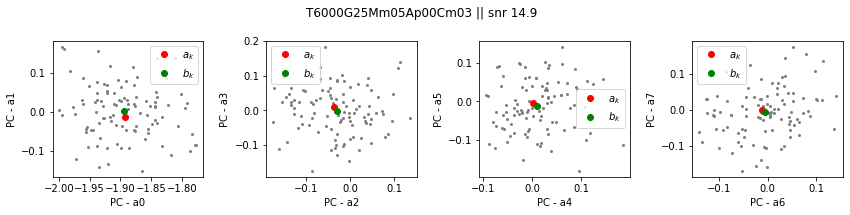

In [430]:
coeff, COEFF,snr=bb.eval_coeff_bias(bb.PhyMid, snr=20, N_obs=100, plot=1)

In [403]:
coeff

array([-1.89189589e+00, -1.29541130e-02, -3.72722472e-02,  1.01674931e-02,
        1.65208172e-03, -3.71346772e-03, -1.13098203e-02,  1.05191238e-03,
       -6.76999511e-03,  9.55919932e-04])

In [ ]:
idx1, idx2 = 1,2

Text(0, 0.5, 'bias at noise_level=0')

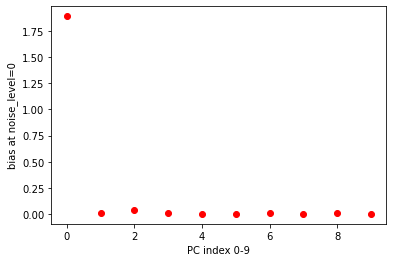

In [395]:
plt.plot(abs(COEFF[0]), "ro")
plt.xlabel("PC index 0-9")
plt.ylabel("bias at noise_level=0")

In [410]:
bb.topk=10

In [ ]:
bb.evel

#220 R=1000.00
(2204,) (220,)
Building RBF with gaussan kernel on data shape (2880, 220)


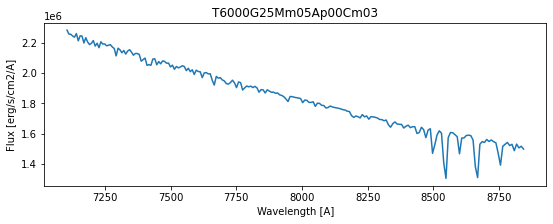

In [193]:
R="R"; 
W="RedM"; Res=5000;step=10;
bR = BoxWR()
bR.init(W,R, Res,step)

100%|██████████| 10/10 [00:34<00:00,  3.42s/it]


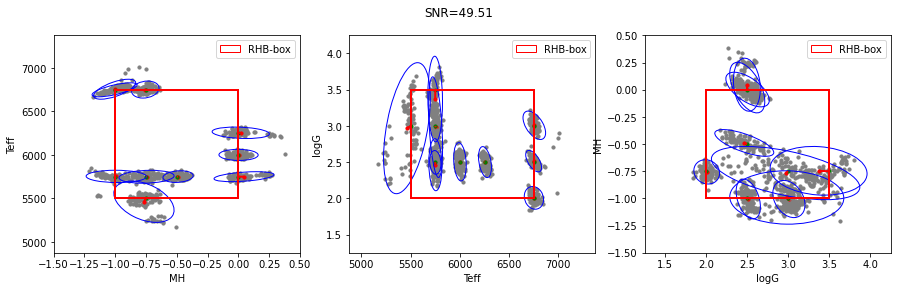

In [294]:
snr = 50
bb.eval_LLH_snr(snr, N_pmt=10, N_obs=100)

100%|██████████| 10/10 [01:40<00:00, 10.01s/it]


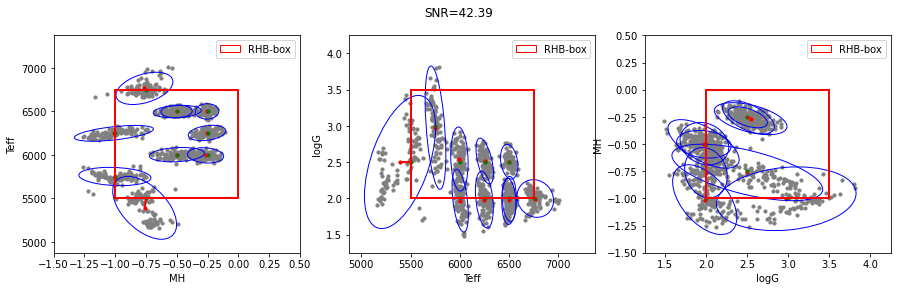

In [195]:
snr = 50
bR.eval_LLH_snr(snr, N_pmt=10, N_obs=100)

100%|██████████| 10/10 [01:46<00:00, 10.67s/it]


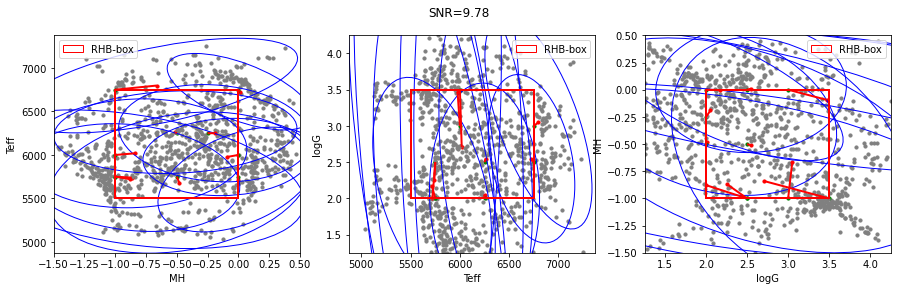

In [196]:
snr = 10
bR.eval_LLH_snr(snr, N_pmt=10, N_obs=100)

100%|██████████| 10/10 [00:56<00:00,  5.67s/it]


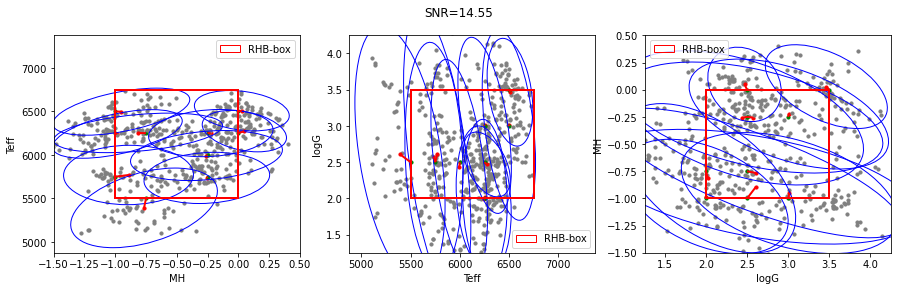

In [197]:
snr = 20
bR.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

#220 R=1000.00
(2204,) (220,)
Building RBF with gaussan kernel on data shape (7776, 220)


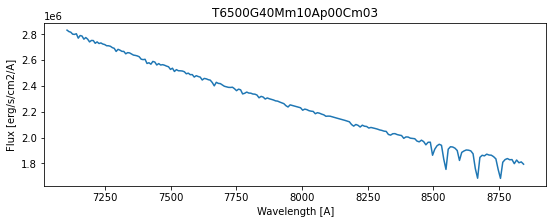

In [198]:
R="W"; 
W="RedM"; Res=5000;step=10;
bW = BoxWR()
bW.init(W,R, Res,step)

100%|██████████| 10/10 [02:27<00:00, 14.71s/it]


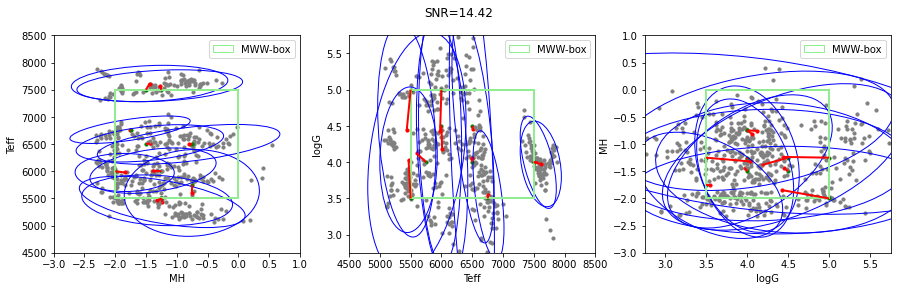

In [200]:
snr = 20
bW.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

100%|██████████| 10/10 [02:44<00:00, 16.43s/it]


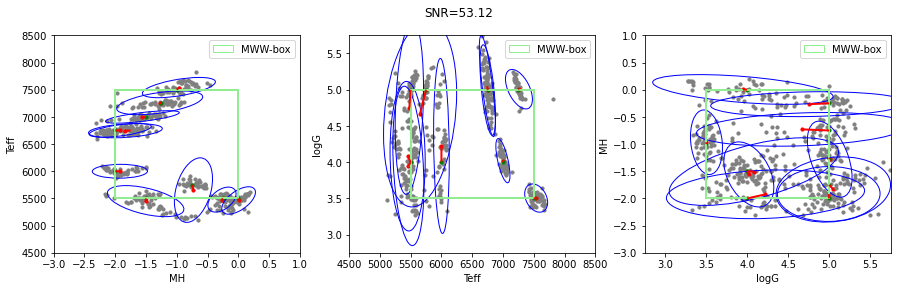

In [201]:
snr = 50
bW.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

#220 R=1000.00
(2204,) (220,)
Building RBF with gaussan kernel on data shape (5760, 220)


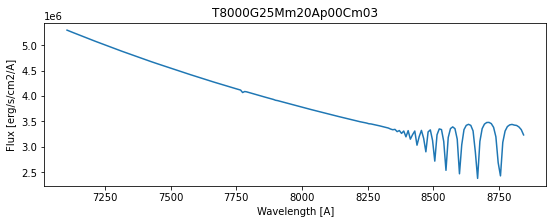

In [202]:
R="B"; 
W="RedM"; Res=5000;step=10;
bB = BoxWR()
bB.init(W,R, Res,step)

100%|██████████| 10/10 [01:56<00:00, 11.60s/it]


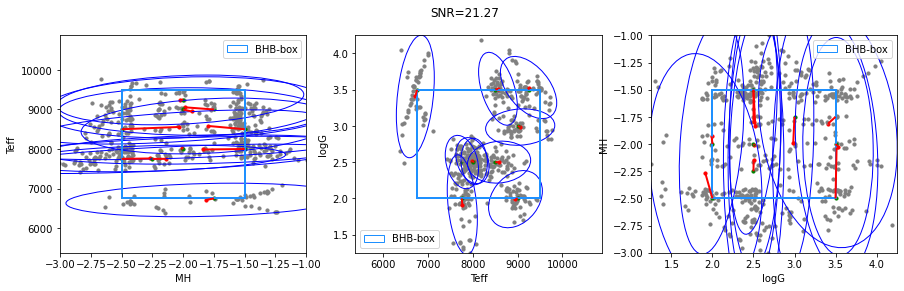

In [203]:
snr = 20
bB.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

100%|██████████| 10/10 [01:59<00:00, 11.95s/it]


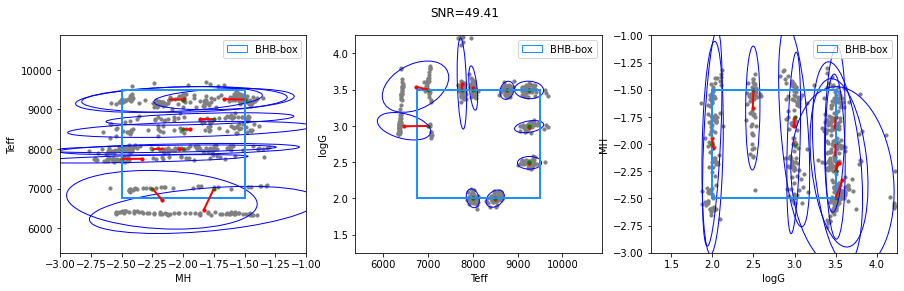

In [204]:
snr = 50
bB.eval_LLH_snr(snr, N_pmt=10, N_obs=50)